In [3]:
#NLTK
import nltk
from nltk.classify import scikitlearn
from nltk.classify.scikitlearn import SklearnClassifier
from nltk import collocations
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize


# Machine learning packages
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import cross_validation



# Data-handeling/mathmatic packages
import numpy as np
import pandas as pd
import re
import random
import matplotlib
from pandas.plotting import _converter
%matplotlib inline


c:\users\jeremy\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
df = pd.read_csv('D:lyrics.csv')

In [5]:
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [6]:
df = df.drop('index',1)
df.head()

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [7]:
len(df)

362237

In [8]:
df.groupby('genre').count().sort_values(['song'], ascending = False)

,song,year,artist,lyrics
genre,,,,
Rock,131377,131377,131377,109235
Pop,49444,49444,49444,40466
Hip-Hop,33965,33965,33965,24850
Not Available,29814,29814,29814,23941
Metal,28408,28408,28408,23759
Other,23683,23683,23683,5189
Country,17286,17286,17286,14387
Jazz,17145,17147,17147,7971
Electronic,16205,16205,16205,7966


In [9]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,song,year,artist,genre,lyrics
158,lemonade,2016,beyonce-knowles,Pop,NaN
305,no-more-tears,2002,eazy-e,Hip-Hop,NaN
311,still-f-kem,2002,eazy-e,Hip-Hop,NaN
320,rev-skit,2002,eazy-e,Hip-Hop,NaN
338,hush-hush,2013,asher-monroe,Pop,NaN


In [10]:
#Removing missing lyrics
df = df[pd.notnull(df['lyrics'])]
df = df.reset_index().drop('index',1)
len(df)


266557

In [11]:
# Reduce size of dataset for local computing (change next cell 'small_df' to 'df' if full dataset is desired)
# Note that the reduction in size decreases the performance of models
small_df = df.sample(frac=0.002)
small_df = small_df.reset_index().drop('index',1)
len(small_df)

533

# Utilizing Text with Machine Learning

In [ ]:
tokens = []
for i in range(len(small_df['lyrics'])):
    tokens.append(word_tokenize(small_df['lyrics'][i].replace('\n',' ')))
small_df['tokens'] = tokens

In [11]:
docs = [(list(tokens),genre)
       for genre in df['genre']
       for tokens in df['tokens']]
docs[0]

(['We',
  'live',
  'for',
  'the',
  'mountains',
  "'Cause",
  'the',
  'mountains',
  'give',
  'us',
  'life',
  'But',
  'the',
  'pits',
  'were',
  'too',
  'inviting',
  'And',
  'they',
  'stripped',
  'away',
  'our',
  'lives',
  'If',
  'I',
  'could',
  'holler',
  'from',
  'this',
  'hollow',
  'For',
  'just',
  'a',
  'little',
  'help',
  'I',
  "'m",
  'sure',
  'the',
  'neighbors',
  'would',
  'come',
  'running',
  'Just',
  'to',
  'see',
  'for',
  'them',
  'selves',
  'And',
  'I',
  'do',
  "n't",
  'give',
  'a',
  'damn',
  'If',
  'you',
  'do',
  "n't",
  'understand',
  "'Cause",
  'I',
  'hear',
  'the',
  'voices',
  'calling',
  'They',
  "'re",
  'sending',
  'me',
  'a',
  'warning',
  'about',
  'you',
  'Is',
  'it',
  'a',
  'haunting',
  'song',
  'from',
  'a',
  'familiar',
  'dream',
  'Or',
  'just',
  'an',
  'Appalachian',
  'scream',
  '?',
  'We',
  "'re",
  'neighbors',
  ',',
  'we',
  "'re",
  'not',
  'friends',
  'I',
  'do',
  "n'

In [12]:
for i in range(len(df)):
    all_words = nltk.FreqDist(w for w in df['tokens'][i])
lyric_features = list(all_words)

In [13]:
def genre_features(genre):
    genre_words = set(song)
    features = {}
    for word in lyric_features:
        features['contains({})'.format(word)] = (word in genre_words)
    return features

In [15]:
featuresets = [(genre_features(d),c) for (d,c) in docs]
train_set, test_set = featuresets[round(len(featuresets)*0.8):], featuresets[:round(len(featuresets)*0.8)]

In [16]:
train_set[0]

({'contains(As)': False,
  'contains(he)': False,
  'contains(came)': False,
  'contains(up)': False,
  'contains(to)': True,
  'contains(the)': True,
  'contains(window)': False,
  'contains(,)': True,
  'contains(heard)': False,
  'contains(sound)': False,
  'contains(of)': False,
  'contains(Barry)': False,
  'contains(Manilow)': False,
  'contains(He)': False,
  'contains(into)': False,
  'contains(her)': False,
  'contains(apartment)': False,
  'contains(smelled)': False,
  'contains(Ben)': False,
  'contains(Gay)': False,
  'contains(and)': True,
  'contains(chocolate)': False,
  'contains(She)': False,
  'contains(was)': False,
  'contains(sitting)': False,
  'contains(at)': True,
  'contains(table)': False,
  'contains(could)': False,
  'contains(see)': True,
  'contains(she)': False,
  'contains(had)': False,
  'contains(a)': True,
  'contains(Bible)': False,
  'contains(Then)': False,
  'contains(ran)': False,
  'contains(bedroom)': False,
  'contains(got)': False,
  'contain

In [15]:
dt_classifier = nltk.DecisionTreeClassifier.train(train_set)
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)
mx_classifier = nltk.MaxentClassifier.train(train_set,max_iter=10,algorithm='gis')

print('Decision Tree Accuracy',nltk.classify.accuracy(dt_classifier,test_set))
print('Naive Bayes Accuracy',nltk.classify.accuracy(nb_classifier,test_set))
print('Max Entropy Accuracy',nltk.classify.accuracy(mx_classifier,test_set))

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -2.30259        0.375
             2          -1.54770        0.375
             3          -1.54147        0.375
             4          -1.54139        0.375
             5          -1.54139        0.375
             6          -1.54139        0.375
             7          -1.54139        0.375
             8          -1.54139        0.375
             9          -1.54139        0.375
         Final          -1.54139        0.375
Decision Tree Accuracy 0.40337746566873905
Naive Bayes Accuracy 0.4026470601176569
Max Entropy Accuracy 0.40337746566873905


In [16]:
#Sklearn classifiers and results
classifierMNB = SklearnClassifier(MultinomialNB())
classifierBNB = SklearnClassifier(BernoulliNB())
classifierLR = SklearnClassifier(LogisticRegressionCV())
classifierRF = SklearnClassifier(RandomForestClassifier())
classifierSVM = SklearnClassifier(SVC())

classifierMNB.train(train_set)
classifierLR.train(train_set)
classifierBNB.train(train_set)
classifierRF.train(train_set)
classifierSVM.train(train_set)

print('Multinomial NB Accuracy',nltk.classify.accuracy(classifierMNB,test_set))
print('Logistic Regression Accuracy',nltk.classify.accuracy(classifierLR,test_set))
print('Bernoulli NB Accuracy',nltk.classify.accuracy(classifierBNB,test_set))
print('Random Forest Accuracy',nltk.classify.accuracy(classifierRF,test_set))
print('Support Vector Machine Accuracy',nltk.classify.accuracy(classifierSVM,test_set))

Multinomial NB Accuracy 0.40269106045205944
Logistic Regression Accuracy 0.40337746566873905
Bernoulli NB Accuracy 0.40269106045205944
Random Forest Accuracy 0.40337746566873905
Support Vector Machine Accuracy 0.40337746566873905


In [17]:
nb_classifier.show_most_informative_features(20)

Most Informative Features
      contains(survival) = True              R&B : Rock   =      1.5 : 1.0
       contains(predict) = True              R&B : Rock   =      1.5 : 1.0
       contains(subsist) = True              R&B : Rock   =      1.5 : 1.0
      contains(formless) = True              R&B : Rock   =      1.5 : 1.0
   contains(Destination) = True              R&B : Rock   =      1.5 : 1.0
       contains(Ominous) = True              R&B : Rock   =      1.5 : 1.0
       contains(possess) = True              R&B : Rock   =      1.5 : 1.0
     contains(Vindicate) = True              R&B : Rock   =      1.5 : 1.0
           contains(we-) = True              R&B : Rock   =      1.5 : 1.0
      contains(creating) = True              R&B : Rock   =      1.5 : 1.0
         contains(shell) = True              R&B : Rock   =      1.2 : 1.0
         contains(haven) = True              R&B : Rock   =      1.2 : 1.0
         contains(filth) = True              R&B : Rock   =      1.2 : 1.0

# Vectorizing Lyrics with ML Methods

In [22]:
X = df['lyrics']
y = df['genre']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size =0.2)

In [22]:
lyric_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf',TfidfTransformer()),
                      ('clf', SGDClassifier(loss = 'hinge',random_state=42,
                                           max_iter=5)),
                     ])

In [23]:
lyric_clf.fit(X_train,y_train)
predict = lyric_clf.predict(X_test)
np.mean(predict == y_test)

0.5060586734693877

In [24]:
print(metrics.classification_report(y_test, predict))

               precision    recall  f1-score   support

      Country       0.45      0.08      0.13      2784
   Electronic       0.12      0.06      0.08      1571
         Folk       0.19      0.02      0.04       442
      Hip-Hop       0.60      0.79      0.68      4985
        Indie       0.05      0.00      0.01       638
         Jazz       0.35      0.10      0.16      1637
        Metal       0.66      0.37      0.47      4784
Not Available       0.37      0.10      0.16      4759
        Other       0.15      0.04      0.07      1084
          Pop       0.43      0.13      0.20      8152
          R&B       0.33      0.03      0.05       691
         Rock       0.50      0.88      0.64     21785

  avg / total       0.47      0.51      0.43     53312



In [25]:
lyric_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf',TfidfTransformer()),
                      ('clf', MLPClassifier(hidden_layer_sizes=(10,),
                                           max_iter=10)),])

In [26]:
lyric_clf.fit(X_train,y_train)
predict = lyric_clf.predict(X_test)
np.mean(predict == y_test)

C:\Users\Jeremy\Anaconda3\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5531587635054022

In [27]:
print(metrics.classification_report(y_test, predict))

               precision    recall  f1-score   support

      Country       0.46      0.38      0.42      2784
   Electronic       0.46      0.10      0.16      1571
         Folk       0.70      0.12      0.20       442
      Hip-Hop       0.78      0.76      0.77      4985
        Indie       0.48      0.02      0.04       638
         Jazz       0.45      0.28      0.35      1637
        Metal       0.65      0.54      0.59      4784
Not Available       0.38      0.23      0.28      4759
        Other       0.36      0.10      0.16      1084
          Pop       0.40      0.42      0.41      8152
          R&B       0.71      0.06      0.12       691
         Rock       0.58      0.77      0.66     21785

  avg / total       0.54      0.55      0.53     53312



# Exploratory Analysis Based on Genre

In [28]:
df = pd.read_csv('D:lyrics.csv')

In [29]:
df = df.drop('index',1)
df = df[pd.notnull(df['lyrics'])]
df.head()

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [30]:
df_comb=df.groupby(df['genre'])['lyrics'].apply(lambda x: ','.join(x))

In [31]:
df_comb

genre
Country          Verse 1:\nWhen the last, breath of life\nIs go...
Electronic       (Reverse) Behold the finite set of thirteen co...
Folk             Rise and fall, like the tide\nMy hand goes wit...
Hip-Hop          (horns)...\n(chorus)\nTimbo- When you hit me o...
Indie            Don't feel so bad,\nIt's just the way the whee...
Jazz             If I've had my way I'd leave here today I'd le...
Metal            Gods Of The Mountains\nSky, Forest And Seas\nL...
Not Available    Santa Claus was scootin'across the roof tops '...
Other            (A little thin band, her finger left hand)\nSh...
Pop              Oh baby, how you doing?\nYou know I'm gonna cu...
R&B              (Little wallflower on the shelf, standing by h...
Rock             A lot of cats are hatin', slandering makin' ba...
Name: lyrics, dtype: object

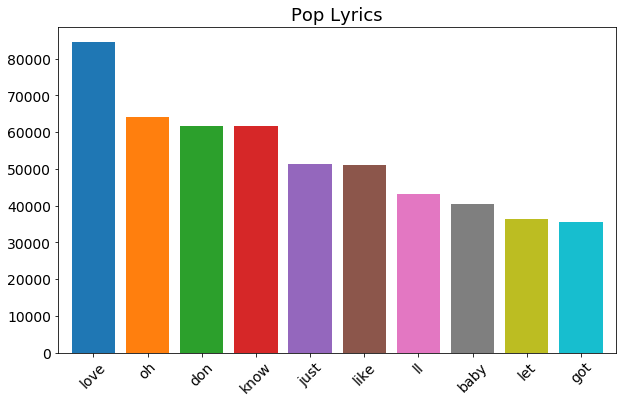

In [32]:
genre = 'Pop'
lyrics = df_comb[genre]
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform([lyrics])
features = count_vectorizer.get_feature_names()
d = pd.Series(count_matrix.toarray().flatten(), 
             index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=45,
            title='Pop Lyrics')
ax.title.set_size(18)

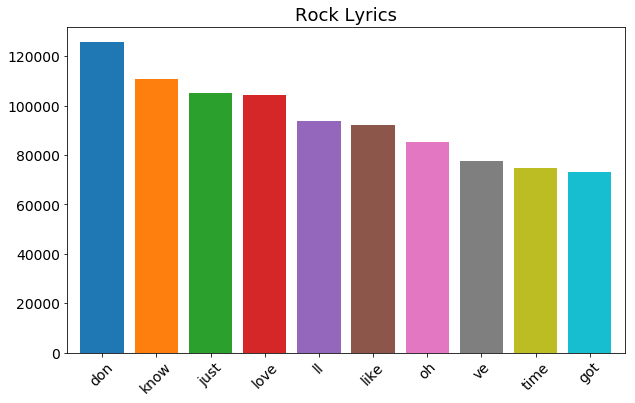

In [33]:
genre = 'Rock'
lyrics = df_comb[genre]
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform([lyrics])
features = count_vectorizer.get_feature_names()
d = pd.Series(count_matrix.toarray().flatten(), 
             index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=45,
            title='Rock Lyrics')
ax.title.set_size(18)

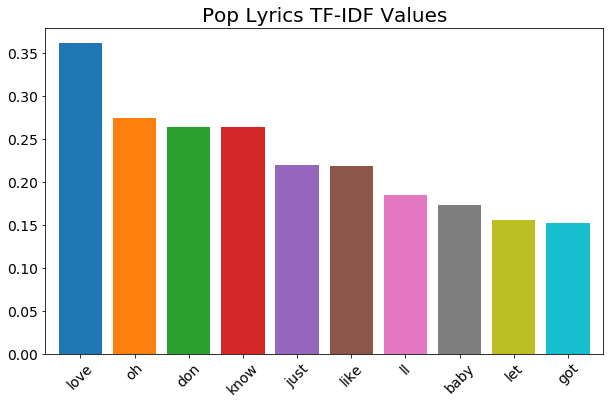

In [34]:
genre = 'Pop'
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_comb)
features = tfidf_vectorizer.get_feature_names()
row = df_comb.index.get_loc(genre)
d = pd.Series(tfidf_matrix.getrow(row).toarray().flatten(), index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', title='Pop Lyrics TF-IDF Values',
            figsize=(10,6), width=.8, fontsize=14, rot=45 )
ax.title.set_size(20)

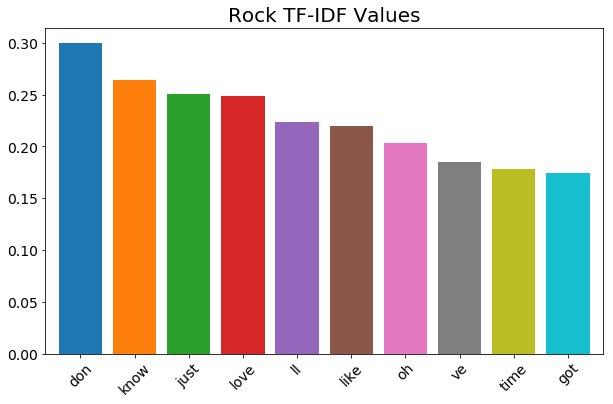

In [35]:
genre = 'Rock'
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_comb)
features = tfidf_vectorizer.get_feature_names()
row = df_comb.index.get_loc(genre)
d = pd.Series(tfidf_matrix.getrow(row).toarray().flatten(), index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', title='Rock TF-IDF Values',
            figsize=(10,6), width=.8, fontsize=14, rot=45 )
ax.title.set_size(20)

In [36]:
neighbors = NearestNeighbors(n_neighbors=12).fit(tfidf_matrix)

In [37]:
def closest_neighbors(genre):
    row = df_comb.index.get_loc(genre)
    distances,indices = neighbors.kneighbors(tfidf_matrix.getrow(row))
    genres_similar = pd.Series(indices.flatten()).map(df_comb.reset_index()['genre'])
    result = pd.DataFrame({'distance':distances.flatten(), 'genre':genres_similar})
    return result
    

In [38]:
for i in range(len(df_comb)):
    print('Genre:%s' % df_comb.index[i],'\n',closest_neighbors(df_comb.index[i]),'\n')

Genre:Country 
     distance          genre
0   0.000000        Country
1   0.281073           Rock
2   0.285331           Jazz
3   0.325670          Indie
4   0.369823            R&B
5   0.395175     Electronic
6   0.417325            Pop
7   0.453589           Folk
8   0.495833  Not Available
9   0.583137          Other
10  0.626827          Metal
11  0.691162        Hip-Hop 

Genre:Electronic 
     distance          genre
0   0.000000     Electronic
1   0.249166           Rock
2   0.261724            Pop
3   0.306620          Indie
4   0.322698            R&B
5   0.357033           Jazz
6   0.376736  Not Available
7   0.395175        Country
8   0.480089          Other
9   0.495542           Folk
10  0.591255          Metal
11  0.609826        Hip-Hop 

Genre:Folk 
     distance          genre
0   0.000000           Folk
1   0.429455          Indie
2   0.430406           Rock
3   0.453589        Country
4   0.456336  Not Available
5   0.458099           Jazz
6   0.477529            

# Exploratory Analysis Based on Decade

In [39]:
df = pd.read_csv('D:lyrics.csv')
df = df.drop('index',1)
df = df[pd.notnull(df['lyrics'])]
df = df.reset_index()


In [40]:
def times(c):
    if 1950 <= c and c < 1960:
        return 1950
    elif 1960 <= c and c < 1970:
        return 1960
    if 1970 <= c and c < 1980:
        return 1970
    elif 1980 <= c and c < 1990:
        return 1980
    elif 1990 <= c and c < 2000:
        return 1990
    elif 2000 <= c and c < 2010:
        return 2000
    elif 2010 <= c and c < 2020:
        return 2010
    return -1

df['year'] = df['year'].apply(int, 1)
df['decade'] = df['year'].apply(times)
df.head()

,index,song,year,artist,genre,lyrics,decade
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",2000
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",2000
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,2000
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",2000
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",2000


In [41]:
df = df[df.decade != -1]
df.head()

,index,song,year,artist,genre,lyrics,decade
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",2000
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",2000
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,2000
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",2000
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",2000


In [42]:
df_comb=df.groupby(df['decade'])['lyrics'].apply(lambda x: ','.join(x))
df_comb

decade
1960    I'm crazy for my baby\nBut my baby she don't l...
1970    If I've had my way I'd leave here today I'd le...
1980    Hi there\nYou probably don't remember me, righ...
1990    I still express, yo, I don't smoke weed or ses...
2000    Oh baby, how you doing?\nYou know I'm gonna cu...
2010    (Andre 3000)\nI, I, I left no time to regret\n...
Name: lyrics, dtype: object

In [43]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_comb)

neighbors = NearestNeighbors(n_neighbors=6).fit(tfidf_matrix)

def closest_neighbors(decade):
    row = df_comb.index.get_loc(decade)
    distances,indices = neighbors.kneighbors(tfidf_matrix.getrow(row))
    decade_similar = pd.Series(indices.flatten()).map(df_comb.reset_index()['decade'])
    result = pd.DataFrame({'distance':distances.flatten(), 'decade':decade_similar})
    return result

for i in range(len(df_comb)):
    print('decade:%s' % df_comb.index[i],'\n',closest_neighbors(df_comb.index[i]),'\n')    

decade:1960 
    decade  distance
0    1960  0.000000
1    1970  1.332322
2    1980  1.333827
3    1990  1.338833
4    2000  1.349460
5    2010  1.352794 

decade:1970 
    decade  distance
0    1970  0.000000
1    1980  0.225695
2    1990  0.240858
3    2000  0.316785
4    2010  0.349481
5    1960  1.332322 

decade:1980 
    decade  distance
0    1980  0.000000
1    1990  0.202323
2    1970  0.225695
3    2000  0.265168
4    2010  0.298451
5    1960  1.333827 

decade:1990 
    decade  distance
0    1990  0.000000
1    2000  0.166721
2    1980  0.202323
3    2010  0.224602
4    1970  0.240858
5    1960  1.338833 

decade:2000 
    decade  distance
0    2000  0.000000
1    1990  0.166721
2    2010  0.191382
3    1980  0.265168
4    1970  0.316785
5    1960  1.349460 

decade:2010 
    decade  distance
0    2010  0.000000
1    2000  0.191382
2    1990  0.224602
3    1980  0.298451
4    1970  0.349481
5    1960  1.352794 

